# Problem 3: Inferential statistics

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.special import beta
import seaborn as sns
from scipy.optimize import minimize
sns.set()

## Task 1.

In [2]:
np.random.seed(7)

step, start, stop = 1000, 100, 100000
mu, sigma = 1, 1
da={}

for n in range(start, stop, step):
    d = np.random.normal(mu, sigma, n)
    da['n'+str(n)] = d, n, np.mean(d), np.var(d), np.std(d)

### Sub-task (a)

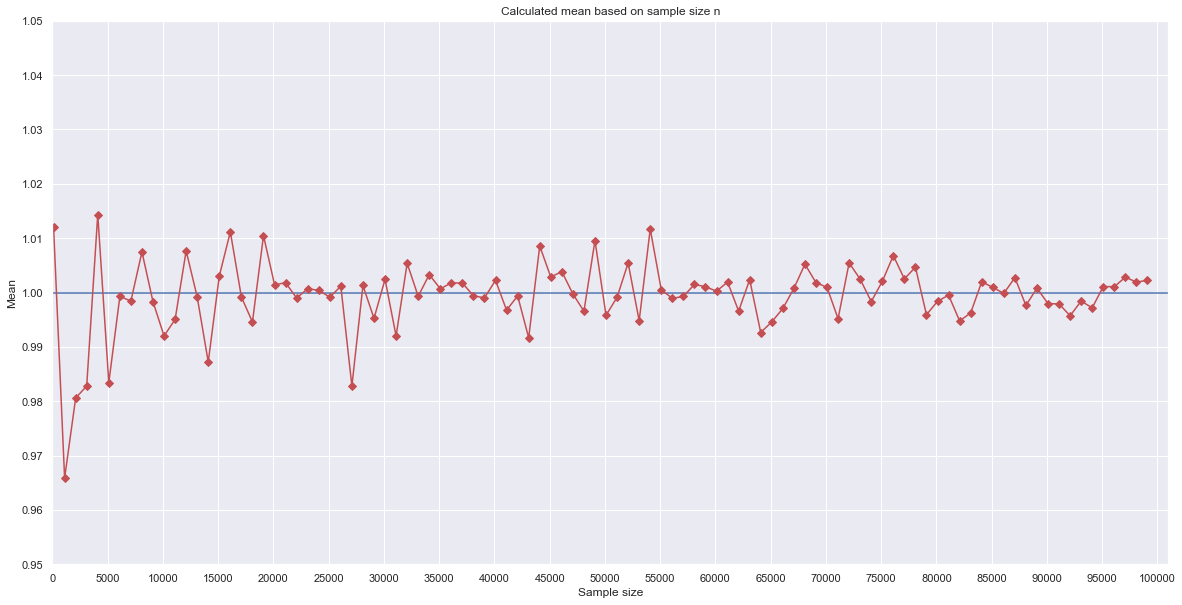

In [3]:
nList=[]
meanList=[]
for item in da:
    _, n, mean, _, _ = da[item]
    nList.append(n)
    meanList.append(mean)
    
plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.2, step=0.01))
plt.axhline(y=1)
plt.ylim(0.95,1.05)
plt.xlim(0,101000)
plt.plot(nList, meanList, '-rD')
plt.title('Calculated mean based on sample size n')

plt.show()

From this plot we could derive that with increase of sample size the mean of each new sample is closer to expected value of 1. We could see that for samples of bigger size, on the right hand side of the plot, values of mean are closer to value of 1. While on the left hand side of plot, mean of sampels with smaller sizes deviates much more from expected value of 1. As result, we could derive that mean of sample converges to expected value with increase of sample size. 

### Sub-task (b)

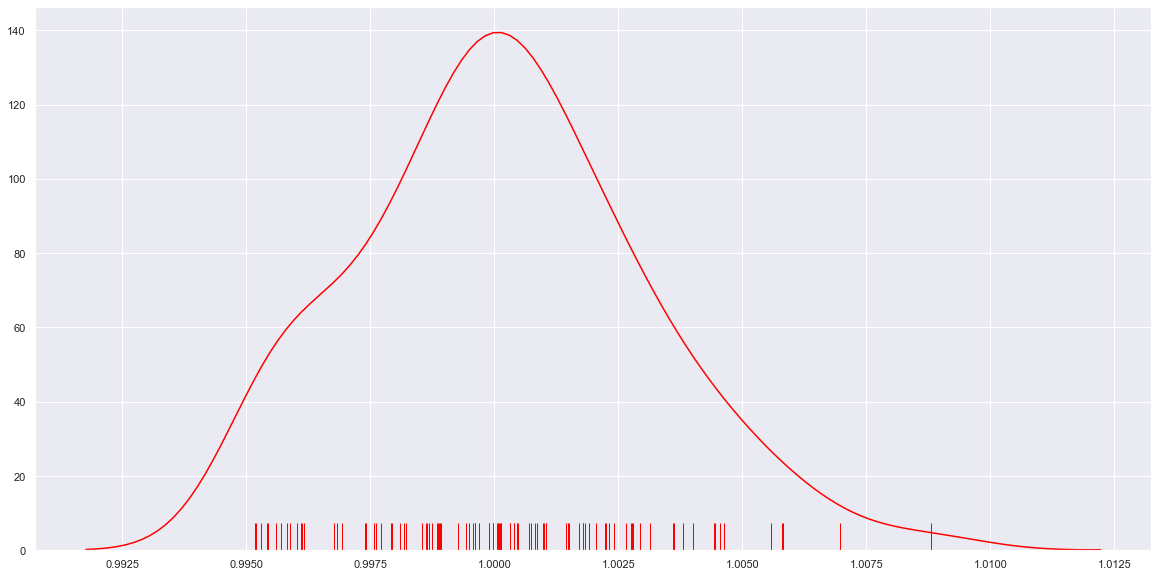

Sample size for deviation 0.01 n = 121801.0


In [4]:
np.random.seed(7)

nSample = 121801
mu, sigma = 1, 1
db={}

for n in range(0, 100, 1):
    d = np.random.normal(mu, sigma, nSample)
    db['n'+str(n)] = d, np.mean(d)

meanList=[]
for item in db:
    _, mean = db[item]
    meanList.append(mean)   

plt.figure(figsize=(20,10))
sns.distplot(meanList, rug=True, hist=False, color='red')
plt.show()

E = 0.01
z9998 = 3.49

print('Sample size for deviation 0.01 n =', (z9998**2)/E**2)


If we use $\bar X$ as estimator and assume Normal distribution, we need to fit bell shape of our distribution of means into interval $1 \pm 0.01$. We could find number of observations needed to obtain estimator which is close to true value with deviation $\pm 0.01$ by using formula $\bar X \pm \frac{z \sigma}{\sqrt{n}}$ which is used for interval calculation. Based on this formula we need to find such $n$ that $\frac{z \sigma}{\sqrt{n}} = \pm 0.01$, hence $ \frac{z \sigma}{\sqrt{n}}=0.01 \implies \sqrt{n} = \frac{z \sigma}{0.01} \implies n = \frac{z^2 \sigma ^2}{0.01^2}$. Let assume z-score for confidence interval of 99,98% $(z=3.49)$ and we will take $\sigma = 1$ which is known, hence $n = \frac{z^2 \sigma ^2}{0.01^2} = \frac{3.49^2 1^2}{0.01^2} = \frac{12.1801‬‬}{0.0001} = 121801‬$. So, with 99,98% of confidence we need at least 121801 observations to obtain an estimator which is close to the true value with deviation $\pm 0.01$.

### Sub-task (c)

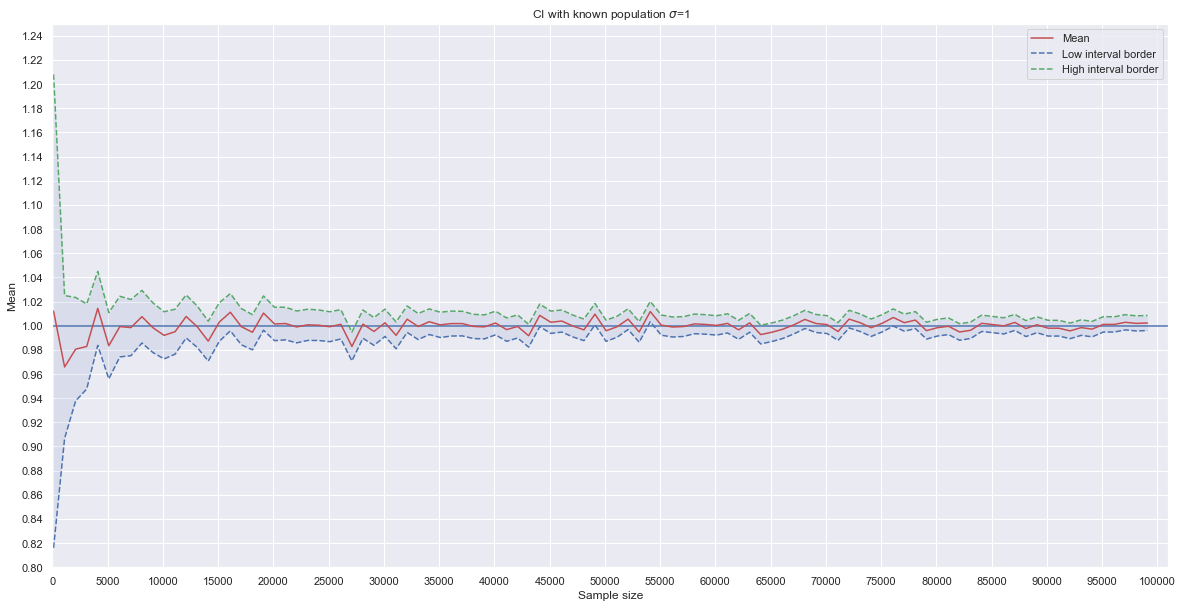

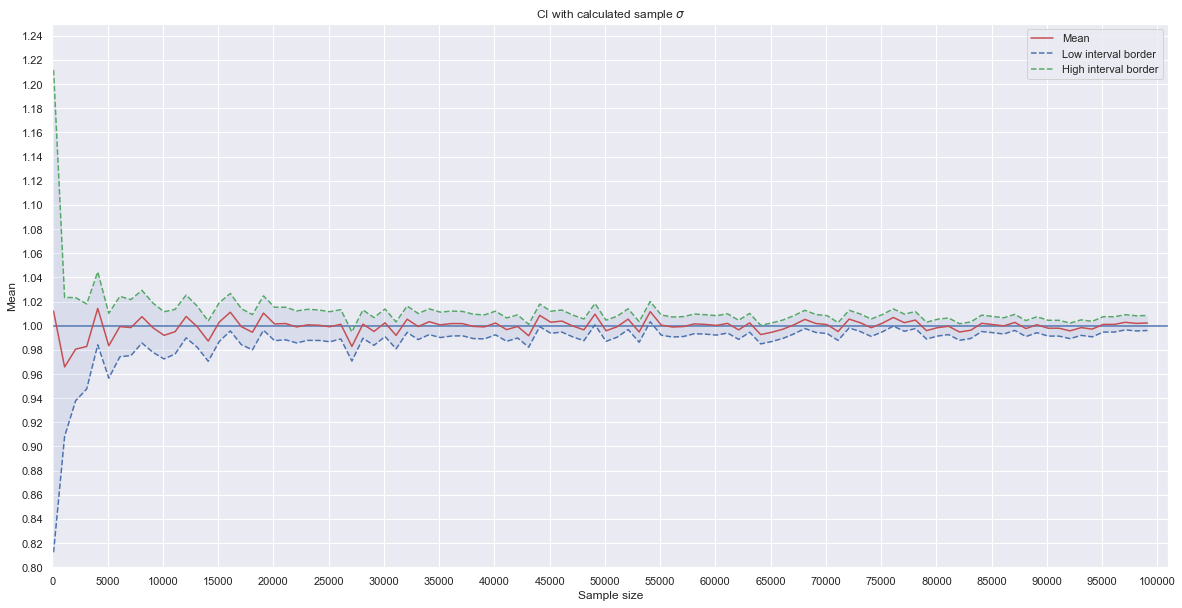

In [5]:
nList=[]
meanList=[]
meanLowList1=[]
meanHighList1=[]
meanLowList2=[]
meanHighList2=[]
stdList=[]
for item in da:
    _, n, mean, _, std = da[item]
    nList.append(n)
    meanList.append(mean)
    meanLowList1.append(mean-1.96/np.sqrt(n))
    meanHighList1.append(mean+1.96/np.sqrt(n))
    stdList.append(std)
    meanLowList2.append(mean-(1.96*std)/np.sqrt(n))
    meanHighList2.append(mean+(1.96*std)/np.sqrt(n))

plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.25, step=0.02))
plt.axhline(y=1)
plt.ylim(0.8,1.25)
plt.xlim(0,101000)
plt.plot(nList, meanList, '-r', label='Mean')
plt.plot(nList, meanLowList1, '--b', label='Low interval border')
plt.plot(nList, meanHighList1, '--g', label='High interval border')
plt.fill_between(nList, meanLowList1, meanHighList1, alpha=0.1)
plt.legend()
plt.title('CI with known population $\sigma$=1')


plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.25, step=0.02))
plt.axhline(y=1)
plt.ylim(0.8,1.25)
plt.xlim(0,101000)
plt.plot(nList, meanList, '-r', label='Mean')
plt.plot(nList, meanLowList2, '--b', label='Low interval border')
plt.plot(nList, meanHighList2, '--g', label='High interval border')
plt.fill_between(nList, meanLowList2, meanHighList2, alpha=0.1)
plt.legend()
plt.title('CI with calculated sample $\sigma$')

plt.show()

Confidence interval, displayed on the plots above, shows that with 95% confidence Mean of generated random samples will be within indicated limits. Also, we could notice that confidence interval become more narrow with increase of n - which is another indication that increase of sample size improve estimator accuracy. Another conclusion we could derive is that confidence interval built with known $\sigma = 1$ and with $\sigma$ calculated from samples deviates very little. Only noticable difference exist with smallest sample size $(n=100)$. Hence with increase of sample size calculated Mean and Variance could be used as good approximation in cases when real $\mu$ and $\sigma^2$ are not known.

Since we know that distribution is a Normal symmetric distribution, then confidence interval calculated based on formula $[\bar X_i - \frac{z \sigma}{\sqrt{n}} , \bar X_i + \frac{z \sigma}{\sqrt{n}}]$, where z is respective z-value for 95% of confidence $(z=1.96)$ and $\bar X_i$ is a Mean of $i-th$ sample.

### Sub-task (d)

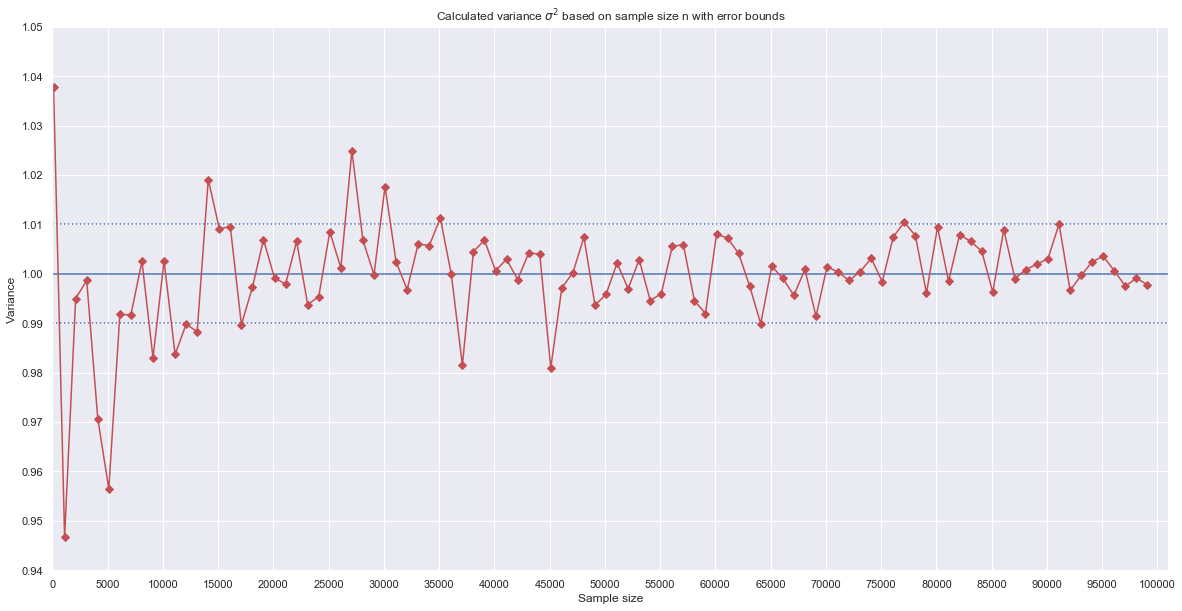

In [6]:
nList=[]
varList=[]
for item in da:
    _, n, _, var, _ = da[item]
    nList.append(n)
    varList.append(var)
    
plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Variance')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.2, step=0.01))
plt.axhline(y=1)
plt.axhline(y=1.01, ls=':')
plt.axhline(y=0.99, ls=':')
plt.ylim(0.94,1.05)
plt.xlim(0,101000)
plt.plot(nList, varList, '-rD')
plt.title('Calculated variance $\sigma^2$ based on sample size n with error bounds')

plt.show()

From this plot we could derive that with increase of sample size the variance of each new sample is closer to expected value of 1. We could see that for samples of bigger size, on the right hand side of the plot, values of variance are closer to value of 1. While on the left hand side of plot, variance of sampels with smaller sizes deviates much more from expected value of 1. As result, we could derive that variance of sample converges to expected value with increase of sample size. However, it looks like variance deviates more from expected value then a mean and converges slowly to 1. I think it is caused by fact that variance is squared. In general, with big size of sample calculaed variance could be a good estimator for real unknown variance, but not for smaller sample sizes.

Consistency is a quality which holds true in any conditions. Since variance for smaller sapmle size deviates more then for bigger sample sizes, we could derive it is not a consistent estimator.

## Task 2.

### Sub-task (a)

Density function of $t_{df}-distribution$ is given by formula $f(x)= \frac{(1+\frac{x^2}{df})^{-\frac{df+1}{2}}}{B(df/2, 1/2) \sqrt{df}}$, where $df$ is degree of freedom of respective t-distribution and $B(a,b)$ is a beta function. Lets now write likelihood function as $L_v(x_1,x_2, \dots, x_n)={\displaystyle \prod_{i=1}^{n} f(x_i)} = {\displaystyle \prod_{i=1}^{n} \frac{(1+\frac{x_i^2}{df})^{-\frac{df+1}{2}}}{B(df/2, 1/2) \sqrt{df}}}$. In order to get rid of product we could take log of likelihood function, hence we will get $L_v(x_1,x_2, \dots, x_n)=log({\displaystyle \prod_{i=1}^{n} \frac{(1+\frac{x_i^2}{df})^{-\frac{df+1}{2}}}{B(df/2, 1/2) \sqrt{df}}}) = {\displaystyle \sum_{i=1}^{n} log(\frac{(1+\frac{x_i^2}{df})^{-\frac{df+1}{2}}}{B(df/2, 1/2) \sqrt{df}})} =$ $= {\displaystyle \sum_{i=1}^{n} ( -\frac{df+1}{2} log(1+\frac{x_i^2}{df}) - log(B(df/2, 1/2) \sqrt{df}) )} = {\displaystyle \sum_{i=1}^{n} ( -\frac{df+1}{2} log(1+\frac{x_i^2}{df}) - log(B(df/2, 1/2)) - log(\sqrt{df}) )} =$ $= {\displaystyle -\sum_{i=1}^{n} ( \frac{df+1}{2} log(1+\frac{x_i^2}{df}) + log(B(\frac{df}{2}, \frac{1}{2})) + \frac{1}{2} log(df) )}$.

Now we have log-likelihood function and could maximize this function to find ML estimator for $df$.

### Sub-task (b)

In [48]:
n1 = 100
x1 = np.random.standard_t(5, n1)


def likelihood_func(x, df):
    return -sum(((df+1)/2)*np.log(1+((x**2)/df)) + np.log(df)/2 + np.log(beta(df/2, 1/2)))

def x1_likelihood_func(df):
    return -likelihood_func(x1, df)

res = minimize(x1_likelihood_func, x0=4, tol = 0.001)

print('ML estimator for degree of freedom with sample size n=100 is df_hat =', res.x)

print('\n Additional information:')
print(res)

ML estimator for degree of freedom with sample size n=100 is df_hat = [4.69356263]

 Additional information:
      fun: 153.80112814748983
 hess_inv: array([[2.40377532]])
      jac: array([-0.00014877])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([4.69356263])


Using scipy.optimize we will numerically maximize function with sample generated from $t_5$ distribution of size $n=100$. Resulting ML estimator $\hat {df}$ converges to true value of $df=5$, but do not reach it. Also, multiple executions could give occasinally completely wrong results. I assume it depends from randomply generated samples which is used for optimization. 

Since our log-likelihood function is dependent from two variables - array $x$ and $df$, but we need to optimize function against $df$ only, we introduce another function which is only dependent from $df$. This new function x1_likelihood_func will be optimized instead of log-likelihood one. Also important, since we are maximizing function, we need to revert sign of our log-likelihood function. So, function x1_likelihood_func takes care about sign as well.

### Sub-task (c)

In [119]:
n2= 5000

x2 = np.random.standard_t(5, n2)

def x2_likelihood_func(df):
    return -likelihood_func(x2, df)

res = minimize(x2_likelihood_func, x0=3, tol = 0.001)

print('ML estimator for degree of freedom with sample size n=5000 is df_hat =', res.x)

print('\n Additional information:')
print(res)

ML estimator for degree of freedom with sample size n=5000 is df_hat = [4.7907384]

 Additional information:
      fun: 8186.94765049073
 hess_inv: array([[0.00631906]])
      jac: array([-6.10351562e-05])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 9
     njev: 17
   status: 0
  success: True
        x: array([4.7907384])


With increase of sample size to $n=5000$ we could spot that ML estimator $\hat {df}$ converges to true value of $df=5$ much better that with sample of size $n=100$. Ocassional errors do not appear with bigger sample size and ML estimator $\hat {df} \in (4,6)$ with majority of results around true values of 5. 

As resultm we could conclude that increase of sample size improve robustness and accuracy of ML estimator $\hat {df}$. 

## Task 3.

### Sub-task(a)

In [120]:
np.random.seed(7)

b, n, start, step = 1000, 100, 0, 1

d3={}
df = 2

for i in range(start, b, step):
    d = np.random.chisquare(df, n)
    d3['i'+str(i)] = d, i, np.mean(d), np.var(d)

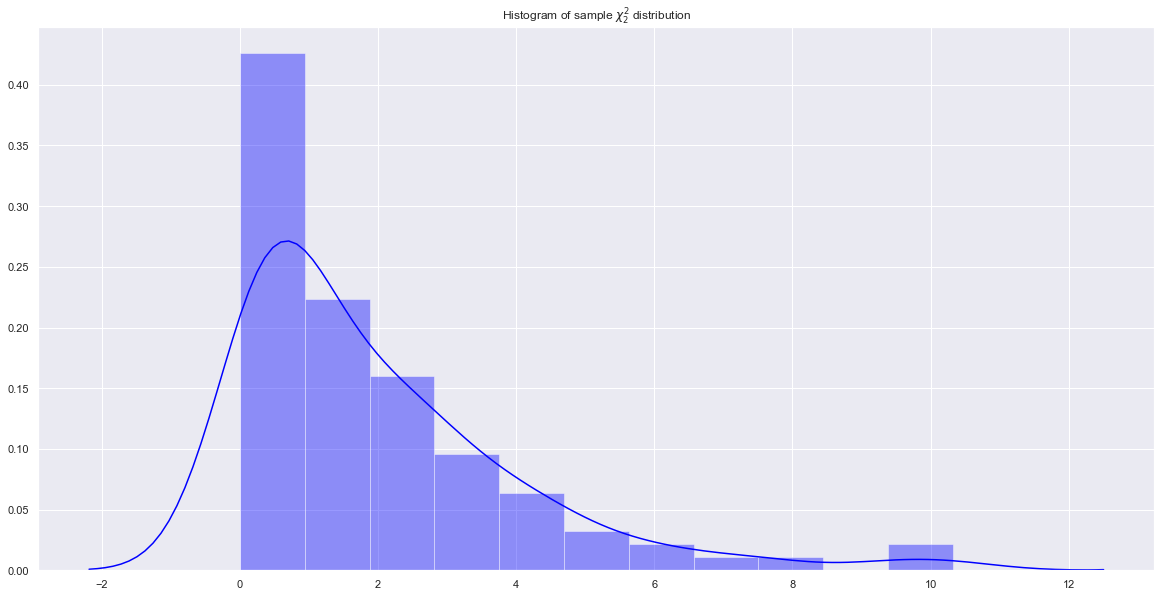

In [121]:
d99, _, _, _ = d3['i99']

plt.figure(figsize=(20,10))
sns.distplot(d99, color='blue')
plt.title('Histogram of sample $\chi^2_2$ distribution')
plt.show()


As per histogram above, sample $\chi^2_2$ distribution is right-skewed distribution with long tail.

### Sub-task (b)

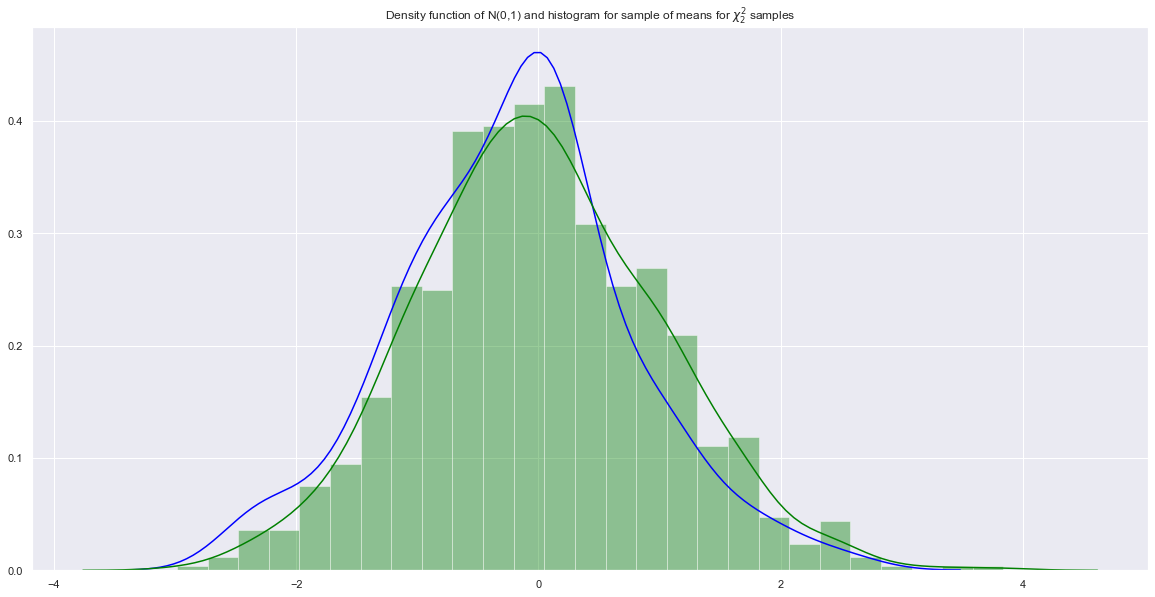

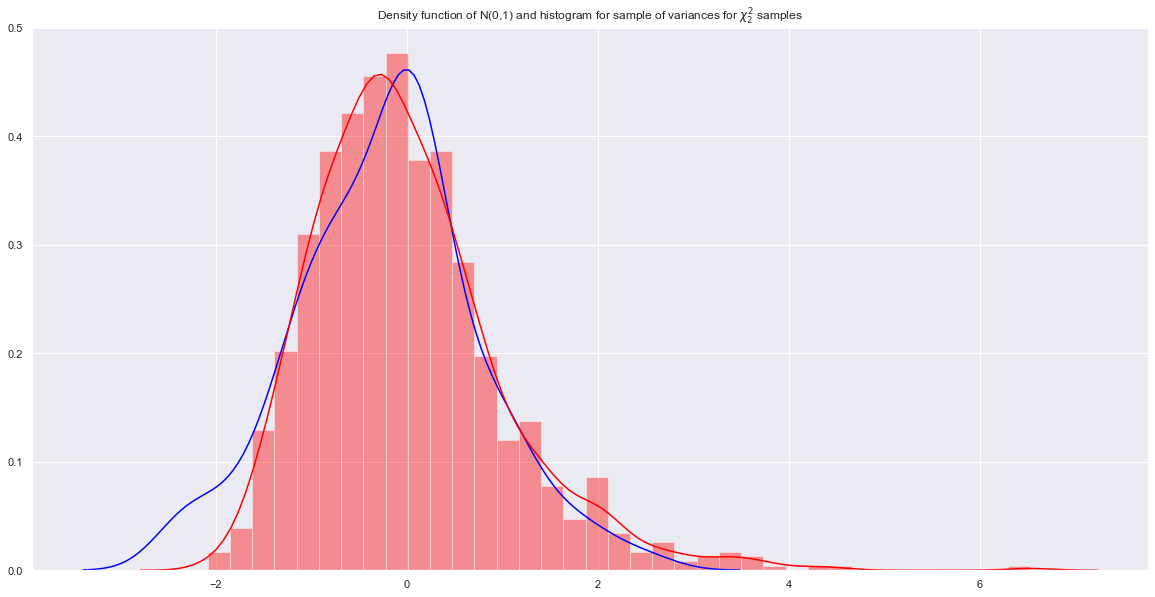

In [140]:
nList=[]
meanList=[]
varList=[]
for item in d3:
    _, n, mean, var = d3[item]
    nList.append(n)
    meanList.append(mean)
    varList.append(var)

dnorm = np.random.normal(0, 1, 100)

array = np.array(meanList)
meanListNorm = (array - np.mean(array))/ np.std(array)

array = np.array(varList)
varListNorm = (array - np.mean(array))/ np.std(array)
    
plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(meanListNorm, color='green')
plt.title('Density function of N(0,1) and histogram for sample of means for $\chi^2_2$ samples')
plt.show()

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(varListNorm, color='red')
plt.title('Density function of N(0,1) and histogram for sample of variances for $\chi^2_2$ samples')
plt.show()

As per Central Limit Theorem (CLT), if we have multiple samples of identical distribution, but not mandatory normal, then distribution of samples means and variances could be aproximated with normal distribution. To aproximate it with $N(0,1)$ we need to perform standartization using formula $Y_i = \frac{\bar X_i - \mu}{\sigma}$. 

As we could see from charts above, after standartization, indeed, density function of means and variances distributions aproximately matches to density function of $N(0,1)$. 

Statistically, means and variances of generated $\chi_2^2$ distributions are approximately normally distributed which is matching with our expectations based on CLT. This gives us ability to apply different tools and methods, which used for normally distributed data, to the data which is not normally distributed. 

### Sub-task (c)

Centrall Limit Theorem (CLT) could be applied not only to means of samples, but also to variances of the samples. It applies to variances as well, because formula for variance is $\sigma^2 = \frac{\sum x - \mu}{n}$ which indicates that variance $\sigma^2$ dependent from mean $\mu$ for given distribution. 

### Sub-task (d)

In [141]:
np.random.seed(7)

b, n_10_3, n_10_4, n_10_5, n_10_6, start, step = 1000, 1000, 10000, 100000, 1000000, 0, 1

d3_10_3={}
d3_10_4={}
d3_10_5={}

df = 2

for i in range(start, b, step):
    d = np.random.chisquare(df, n_10_3)
    d3_10_3['i'+str(i)] = d, i, np.mean(d), np.var(d)
    d = np.random.chisquare(df, n_10_4)
    d3_10_4['i'+str(i)] = d, i, np.mean(d), np.var(d)
    d = np.random.chisquare(df, n_10_5)
    d3_10_5['i'+str(i)] = d, i, np.mean(d), np.var(d)

    

IMPORTANT: Generating size $10^6$ independently because it could be performance intensive and cause memory issues on some laptops (like mine).

In [14]:
d3_10_6={}

for i in range(start, b, step):
    d = np.random.chisquare(df, n_10_6)
    d3_10_6['i'+str(i)] = d, i, np.mean(d), np.var(d)

KeyboardInterrupt: 

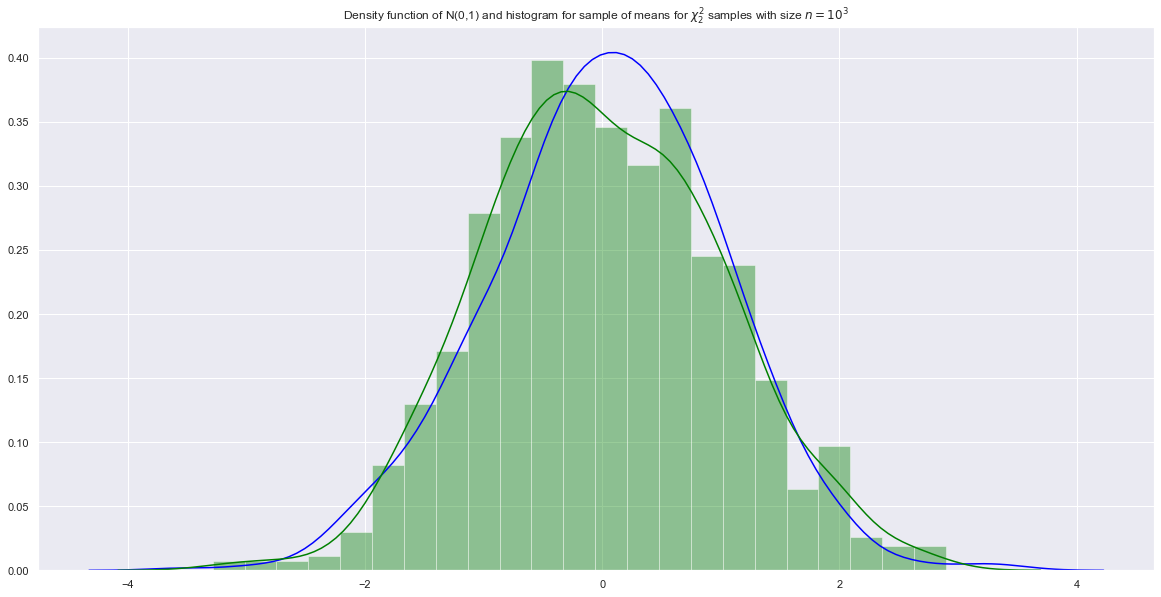

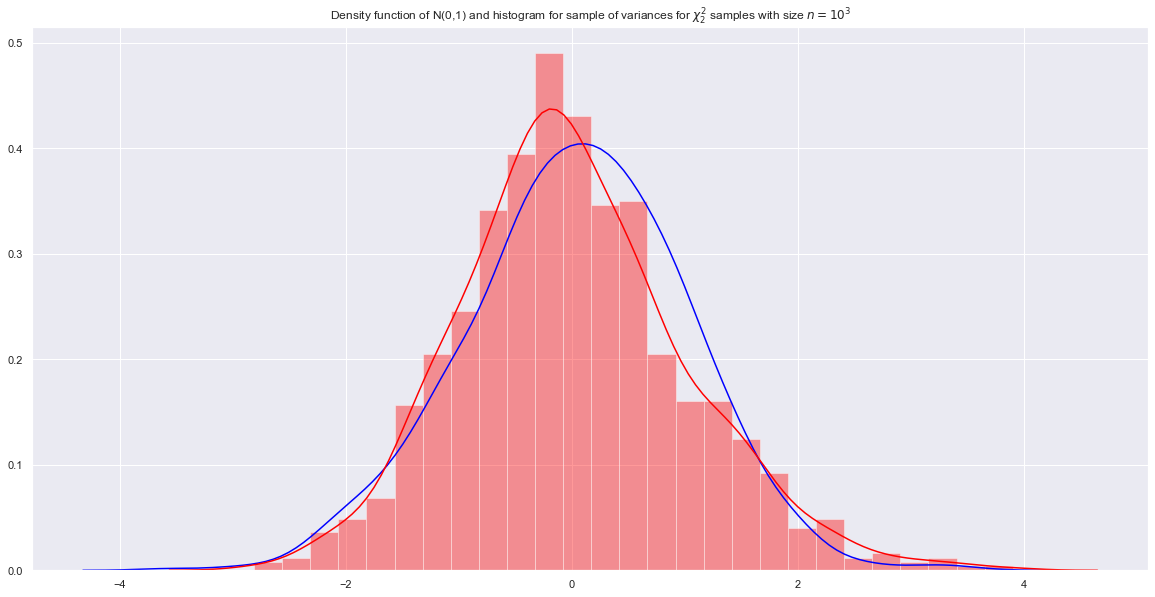

In [143]:
nList=[]
meanList_10_3=[]
varList_10_3=[]
for item in d3_10_3:
    _, n, mean, var = d3_10_3[item]
    nList.append(n)
    meanList_10_3.append(mean)
    varList_10_3.append(var)

dnorm = np.random.normal(0, 1, n_10_3)

array = np.array(meanList_10_3)
meanListNorm = (array - np.mean(array))/ np.std(array)

array = np.array(varList_10_3)
varListNorm = (array - np.mean(array))/ np.std(array)

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(meanListNorm, color='green')
plt.title('Density function of N(0,1) and histogram for sample of means for $\chi^2_2$ samples with size $n=10^3$')
plt.show()

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(varListNorm, color='red')
plt.title('Density function of N(0,1) and histogram for sample of variances for $\chi^2_2$ samples with size $n=10^3$')
plt.show()

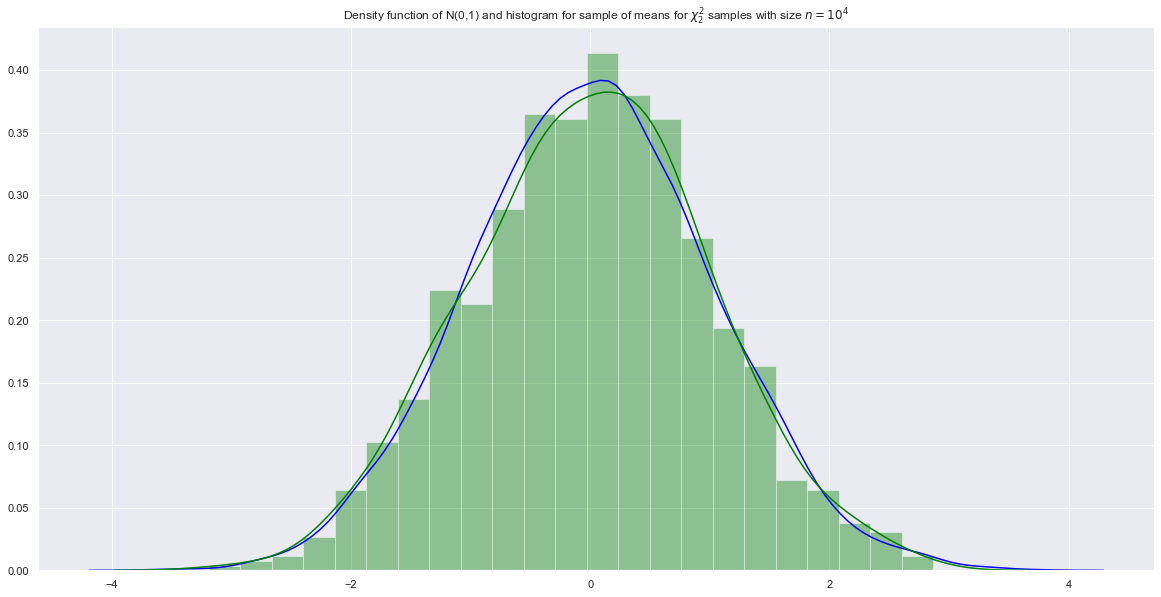

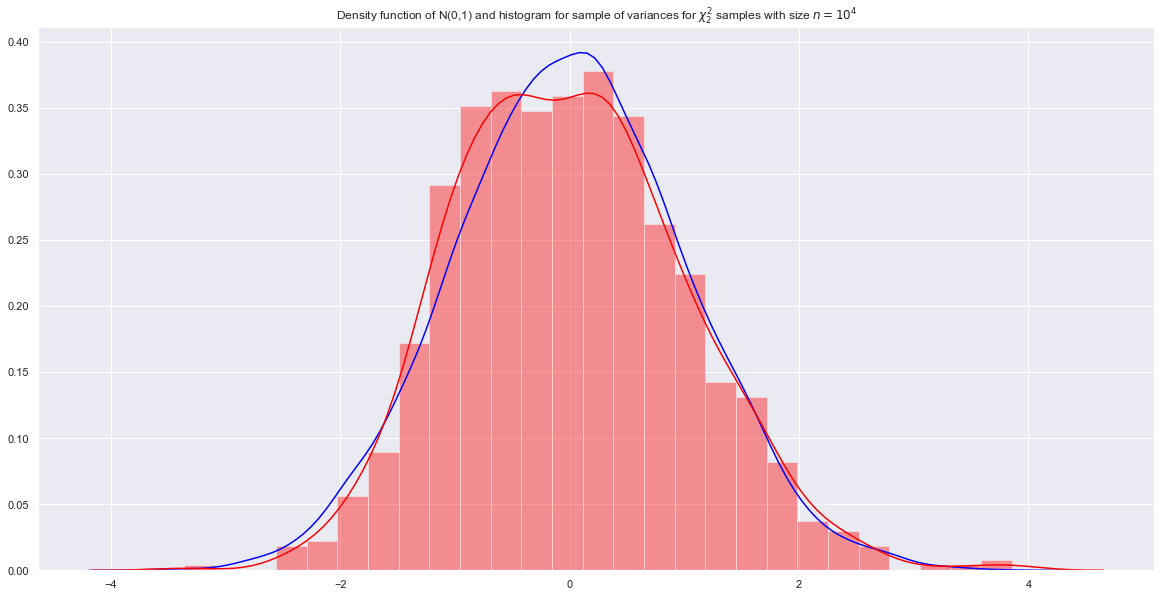

In [146]:
nList=[]
meanList_10_4=[]
varList_10_4=[]
for item in d3_10_4:
    _, n, mean, var = d3_10_4[item]
    nList.append(n)
    meanList_10_4.append(mean)
    varList_10_4.append(var)

dnorm = np.random.normal(0, 1, n_10_4)

array = np.array(meanList_10_4)
meanListNorm = (array - np.mean(array))/ np.std(array)

array = np.array(varList_10_4)
varListNorm = (array - np.mean(array))/ np.std(array)

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(meanListNorm, color='green')
plt.title('Density function of N(0,1) and histogram for sample of means for $\chi^2_2$ samples with size $n=10^4$')
plt.show()

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(varListNorm, color='red')
plt.title('Density function of N(0,1) and histogram for sample of variances for $\chi^2_2$ samples with size $n=10^4$')
plt.show()

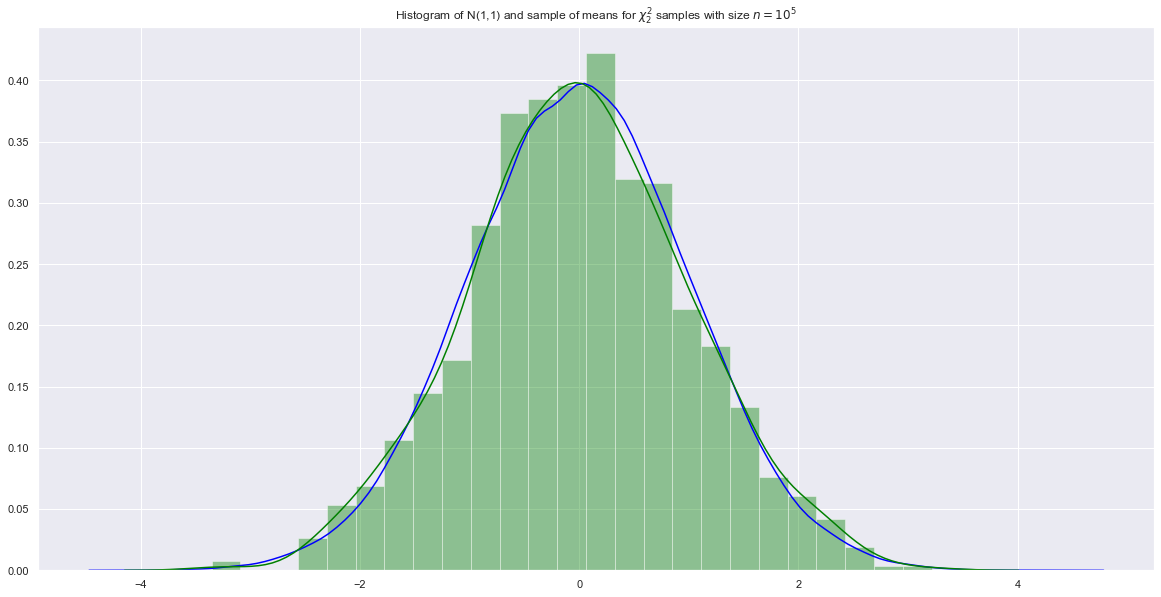

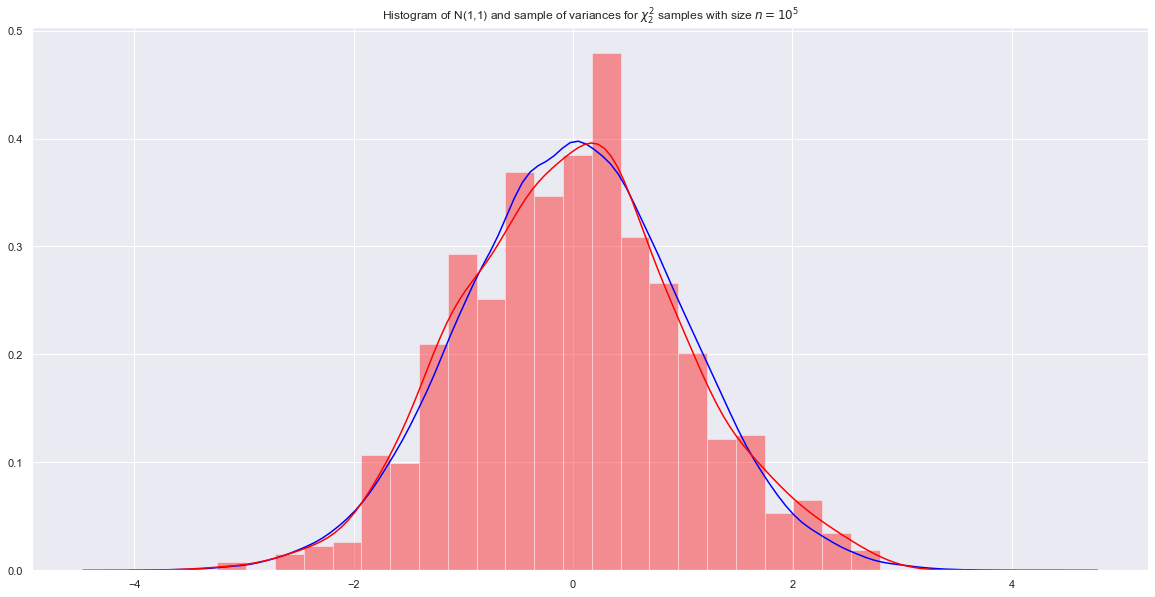

In [147]:
nList=[]
meanList_10_5=[]
varList_10_5=[]
for item in d3_10_5:
    _, n, mean, var = d3_10_5[item]
    nList.append(n)
    meanList_10_5.append(mean)
    varList_10_5.append(var)

dnorm = np.random.normal(0, 1, n_10_5)

array = np.array(meanList_10_5)
meanListNorm = (array - np.mean(array))/ np.std(array)

array = np.array(varList_10_5)
varListNorm = (array - np.mean(array))/ np.std(array)

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(meanListNorm, color='green')
plt.title('Density function of N(0,1) and histogram for sample of means for $\chi^2_2$ samples with size $n=10^5$')
plt.show()

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(varListNorm, color='red')
plt.title('Density function of N(0,1) and histogram for sample of variances for $\chi^2_2$ samples with size $n=10^5$')
plt.show()

IMPORTANT: Using size $10^6$ restricted due to its generation which could be performance intensive and cause memory issues on some laptops (like mine).

In [148]:
nList=[]
meanList_10_6=[]
varList_10_6=[]
for item in d3_10_6:
    _, n, mean, var = d3_10_6[item]
    nList.append(n)
    meanList_10_6.append(mean)
    varList_10_6.append(var)

dnorm = np.random.normal(0, 1, n_10_6)

array = np.array(meanList_10_6)
meanListNorm = (array - np.mean(array))/ np.std(array)

array = np.array(varList_10_6)
varListNorm = (array - np.mean(array))/ np.std(array)

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(meanListNorm, color='green')
plt.title('Density function of N(0,1) and histogram for sample of means for $\chi^2_2$ samples with size $n=10^6$')
plt.show()

plt.figure(figsize=(20,10))
sns.distplot(dnorm, color='blue', hist=False)
sns.distplot(varListNorm, color='red')
plt.title('Density function of N(0,1) and histogram for sample of variances for $\chi^2_2$ samples with size $n=10^6$')
plt.show()

NameError: name 'd3_10_6' is not defined

Increase of each sample size leads to distribution of sample means and sample variances to be more and more fit to the standard normal distrobution $N(0,1)$ (after normalization applied). This we could observe from charts above. For sizes $10^5$ or $10^6$ density functions almost matches with very minor deviations across whole distribution. With smaller size, peak of density function was approximated better then tails. With increase of sample size, good approximation stretched to the tails as well. Shape of original samples distribution does not matter and won't have any impact. 

Only sample size have impact on approximation accuracy, number of samples assumed to be infinite, but it does not impacts how well distrobution of samples means and variances could be approximated by normal distribution. 

## Task 4.

### Sub-task(a)

T-critical values are -2.081161540890138 and 2.081161540890138
T-statistic value is 0.11843483021710395
Rejection area is (-inf; -2.081161540890138 ) and ( 2.081161540890138 ; inf)
With confidence of 96% we could not reject null hypotesis H0


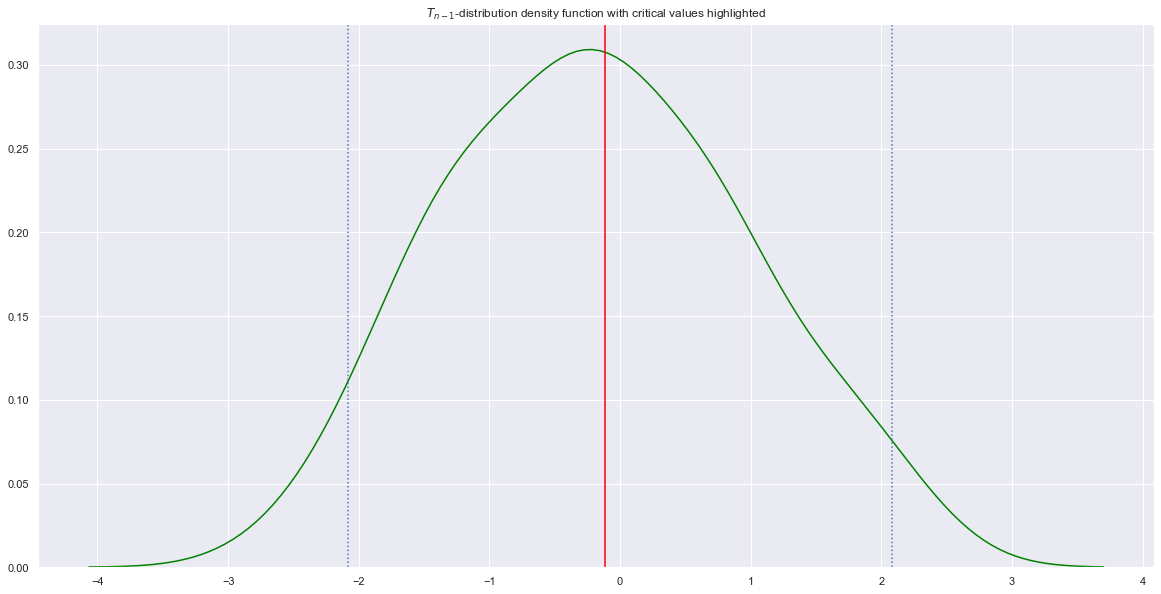

In [168]:
np.random.seed(7)

n = 100
muZ, sigmaZ = 0, 1
muX, sigmaX = 500, 50
alpha=0.04

d4X=[]
dZ = np.random.normal(muZ, sigmaZ, n)
for i in dZ:
    d4X.append(muX+np.sqrt(sigmaX)*i)

sMean = np.mean(d4X)
sSTD = np.std(d4X)
df = n-1

dT = np.random.standard_t(df, n)

tCritical = stats.t.ppf(q=alpha/2, df=df)
tStat = (np.sqrt(n)*(sMean-muX))/sSTD

print('T-critical values are', tCritical, 'and', -tCritical)
print('T-statistic value is', tStat)
print('Rejection area is (-inf;', tCritical, ') and (', -tCritical, '; inf)')
print('With confidence of 96% we could not reject null hypotesis H0')

plt.figure(figsize=(20,10))
sns.distplot(dT, color='green', hist=False)
plt.axvline(x=tCritical, ls=':')
plt.axvline(x=-tCritical, ls=':')
plt.axvline(x=-tStat, color='red')
plt.title('$T_{n-1}$-distribution density function with critical values highlighted')
plt.show()

Null hypotesis $H_0: \mu = 500$. Alternative hypotesis - $H_1: \mu \neq 500$.

T-critical values are -2.0812 and 2.0812. Hence rejection area is ($-\inf$; -2.0812) $\cup$ (2.0812; $\inf$). As we have t-statistic equal to 0.12, with 96% of confidence we could not reject null hypotesis $H_0$.

### Sub-task (b)

In [171]:
pMan = (1 - stats.t.cdf(abs(tStat), df))*2
print('Manually calculated p-value = %e' % pMan)

t, p = stats.ttest_1samp(d4X, muX)
print('T-statistic from built-in function t=', t, 'p-value from built-in function p=', p)

if p < alpha:
   print("We are rejecting null hypothesis")
else:
  print("We could not reject null hypothesis")

Manually calculated p-value = 9.059631e-01
T-statistic from built-in function t= 0.11784116818187391 p-value from built-in function p= 0.9064322657111953
We could not accept null hypothesis


Calculated manually t-statistic and p-value matches to the ones from in-built function. Hence calculation were performed correctly. Smallest p-value means we should reject $H_0$. In our case p-value is greater that $\alpha$ hence we could not reject null hypotesis.

### Sub-task (c)

In [175]:
M = 1000
pList=[]

for i in range (0, M , 1):
    d = np.random.normal(muX, np.sqrt(sigmaX), n)
    t, p = stats.ttest_1samp(d, muX)
    if p < alpha:
        p=1
    else:
        p=0
    pList.append(p)

alphaHat = 0
for i in pList:
    alphaHat+=i

alphaHat = alphaHat/M

print('Empirical confidence level (empirical size) of the test is alpha_hat = ', alphaHat)

Empirical confidence level (empirical size) of the test is alpha_hat =  0.048


For multipl attempts we see that empirical confidence level is around true value of $\alpha = 0.04$. Each execution brings slightly different results, but all of them are around true value of 0.04. This is expected since initially we took normal disribution with mean 500 and this were our null hypotesis. Hence, we should have only minor difference. 

### Sub-task (d)

In [181]:
df=3
pList=[]

for i in range (0, M , 1):
    d = np.random.standard_t(df, n)
    dZ=muX+(np.sqrt(sigmaX) * d)/np.sqrt(df)
    t, p = stats.ttest_1samp(dZ, muX)
    if p < alpha:
        p=1
    else:
        p=0
    pList.append(p)

alphaHat = 0
for i in pList:
    alphaHat+=i

alphaHat = alphaHat/M

print('Empirical confidence level (empirical size) of the test is alpha_hat = ', alphaHat)

Empirical confidence level (empirical size) of the test is alpha_hat =  0.049


Here we expect increae in Empirical confidence level because amount of rejection should increase. But since t-distribution behaves close to normal one - amount of errors is not high. 

### Sub-task (e)

In [179]:
alpha = 0.05
dfRange = range(2, 51)
cList=[]

for df in dfRange:
    c=0
    for i in range (0, M, 1):
        d=np.random.standard_t(df, n)
        D, p = stats.kstest(d, 'norm')
        if p < alpha:
            c+=1
    cList.append(c)

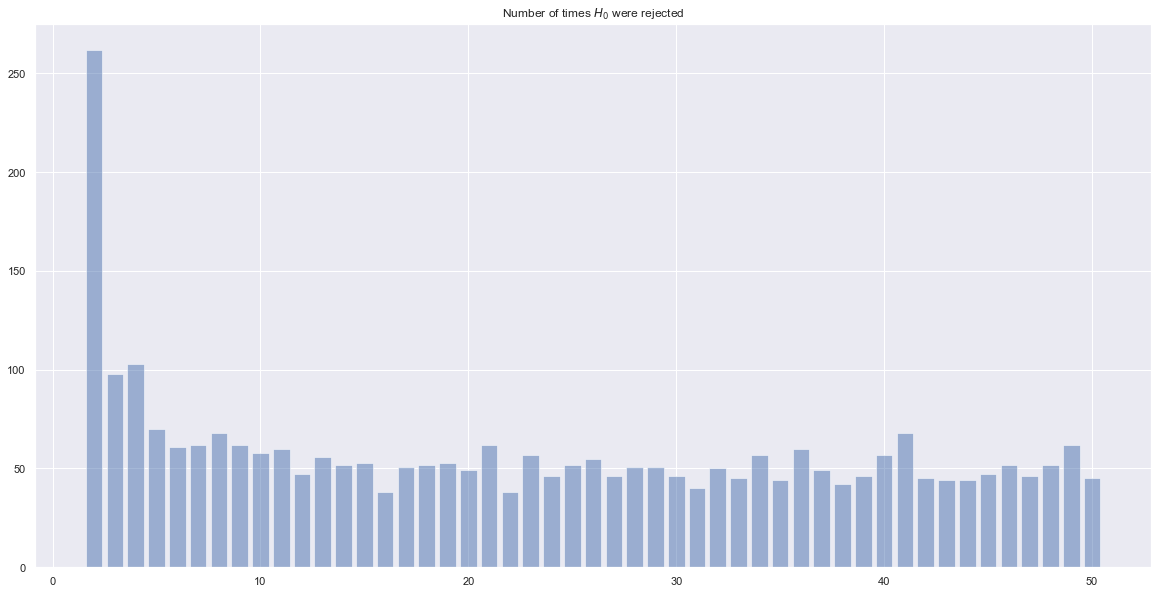

In [178]:
plt.figure(figsize=(20,10))
plt.bar(dfRange, cList, align='center', alpha=0.5)
plt.title('Number of times $H_0$ were rejected')
plt.show()

With increase of degree of freedom for t-distribution we could observe that number of null hepotesis rejection decrease. This is caused by the fact that with increase of degree of freedom t-distribution behaves like normal distrobution. With large degree of freedom there is almost no difference between t-distribution and normal distribution. 

We could see that after $df=5$ amount of null hypotesis rejection stabilizes around value 50 which is exactly 0.05 (5%) of total number of samples - 1000. This is expected result because in this case $\alpha=0.05$ which is 5% and it is probability of type 2 errors.